### Load Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend

In [2]:
gdp=pd.read_excel('./gdp.xlsx')
covid=pd.read_excel('./covid_case.xlsx')

In [3]:
gdp.head()

,web-scraper-order,web-scraper-start-url,Contry,Region,2021,2019
0,1642344438-501,https://en.wikipedia.org/wiki/List_of_countrie...,Czech Republic,Europe,"276,914","250,680"
1,1642344438-587,https://en.wikipedia.org/wiki/List_of_countrie...,Brunei,Asia,"15,686","13,469"
2,1642344438-639,https://en.wikipedia.org/wiki/List_of_countrie...,Belize,Americas,"1,909","1,906"
3,1642344438-608,https://en.wikipedia.org/wiki/List_of_countrie...,Bermuda,Americas,NaN,2019
4,1642344438-573,https://en.wikipedia.org/wiki/List_of_countrie...,Botswana,Africa,"17,605","18,340"


In [4]:
gdp=gdp.drop(['web-scraper-order','web-scraper-start-url'],axis=1)
gdp.head()

,Contry,Region,2021,2019
0,Czech Republic,Europe,"276,914","250,680"
1,Brunei,Asia,"15,686","13,469"
2,Belize,Americas,"1,909","1,906"
3,Bermuda,Americas,NaN,2019
4,Botswana,Africa,"17,605","18,340"


In [5]:
len(gdp)

213

In [6]:
covid.head()

,web-scraper-order,web-scraper-start-url,Country id,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ \n1M pop,Population,Continent
0,1642343797-356,https://www.worldometers.info/coronavirus/,136.0,Syria,"50,674",NaN,"2,944",NaN,"34,394",NaN,"13,336",NaN,"2,791",162,"146,269","8,057","18,153,516",Asia
1,1642343797-277,https://www.worldometers.info/coronavirus/,57.0,Bolivia,"749,070","+9,150","20,238",+50,"590,186","+7,937","138,646",220,"62,853","1,698","2,653,186","222,624","11,917,774",South America
2,1642343797-410,https://www.worldometers.info/coronavirus/,190.0,Comoros,"7,756",+11,159,NaN,"6,980",+192,617,NaN,"8,636",177,NaN,NaN,"898,055",Africa
3,1642343797-404,https://www.worldometers.info/coronavirus/,184.0,Eritrea,"8,876",NaN,86,NaN,"8,255",NaN,535,NaN,"2,451",24,"23,693","6,542","3,621,866",Africa
4,1642343797-380,https://www.worldometers.info/coronavirus/,160.0,Somalia,"24,261",NaN,"1,335",NaN,"13,182",NaN,"9,744",NaN,"1,464",81,"400,466","24,162","16,573,922",Africa


In [7]:
covid=covid.drop(['web-scraper-order','web-scraper-start-url','Country id'],axis=1)
covid.head()

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ \n1M pop,Population,Continent
0,Syria,"50,674",NaN,"2,944",NaN,"34,394",NaN,"13,336",NaN,"2,791",162,"146,269","8,057","18,153,516",Asia
1,Bolivia,"749,070","+9,150","20,238",+50,"590,186","+7,937","138,646",220,"62,853","1,698","2,653,186","222,624","11,917,774",South America
2,Comoros,"7,756",+11,159,NaN,"6,980",+192,617,NaN,"8,636",177,NaN,NaN,"898,055",Africa
3,Eritrea,"8,876",NaN,86,NaN,"8,255",NaN,535,NaN,"2,451",24,"23,693","6,542","3,621,866",Africa
4,Somalia,"24,261",NaN,"1,335",NaN,"13,182",NaN,"9,744",NaN,"1,464",81,"400,466","24,162","16,573,922",Africa


In [8]:
covid['Country, Other']=covid['Country, Other'].replace({'USA':'United States',\
    'UK':'United Kingdom','S. Korea':'South Korea','CAR':'Central African Republic',\
    'UAE':'United Arab Emirates','DRC':'DR Congo','St. Vincent Grenadines':'Saint Vincent and the Grenadines',\
    'Macao':'Macau'})

In [9]:
df=pd.merge(left=covid,right=gdp,how='left',left_on='Country, Other',right_on='Contry',suffixes=('_l','_r'))
df

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ \n1M pop,Population,Continent,Contry,Region,2021,2019
0,Syria,"50,674",NaN,"2,944",NaN,"34,394",NaN,"13,336",NaN,"2,791",162,"146,269","8,057","18,153,516",Asia,Syria,Asia,"60,043","20,379"
1,Bolivia,"749,070","+9,150","20,238",+50,"590,186","+7,937","138,646",220,"62,853","1,698","2,653,186","222,624","11,917,774",South America,Bolivia,Americas,"38,547","40,895"
2,Comoros,"7,756",+11,159,NaN,"6,980",+192,617,NaN,"8,636",177,NaN,NaN,"898,055",Africa,Comoros,Africa,"1,281","1,165"
3,Eritrea,"8,876",NaN,86,NaN,"8,255",NaN,535,NaN,"2,451",24,"23,693","6,542","3,621,866",Africa,Eritrea,Africa,"2,254","1,981"
4,Somalia,"24,261",NaN,"1,335",NaN,"13,182",NaN,"9,744",NaN,"1,464",81,"400,466","24,162","16,573,922",Africa,Somalia,Africa,"5,424","1,626"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,United States,"66,664,283",NaN,"873,149",NaN,"43,059,089",NaN,"22,732,045","25,673","199,601","2,614","857,726,168","2,568,137","333,987,717",North America,United States,Americas,"22,939,580","21,433,226"
236,Nepal,"853,738","+4,534","11,620",+3,"816,438",+435,"25,680",114,"28,513",388,"5,004,234","167,131","29,942,040",Asia,Nepal,Asia,"34,265","30,714"
237,Isle of Man,"14,126",NaN,70,NaN,"13,755",NaN,301,1,"164,783",817,"133,676","1,559,358","85,725",Europe,NaN,NaN,NaN,NaN
238,Barbados,"34,961",NaN,269,NaN,"29,511",NaN,"5,181",NaN,"121,428",934,"500,252","1,737,493","287,916",North America,Barbados,Americas,"4,648","5,209"


In [10]:
col=df.columns
col

Index(['Country, Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ \n1M pop', 'Population', 'Continent', 'Contry',
       'Region', '2021', '2019'],
      dtype='object')

In [11]:
col=['Country', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Total Cases/1Mp', 'Deaths/1Mp',
       'Total Tests', 'Tests/1Mp', 'Population', 'Continent', 'Country_2',
       'Region', 'gdp2021', 'gdp2019']
df.columns=col
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,Continent,Country_2,Region,gdp2021,gdp2019
0,Syria,"50,674",NaN,"2,944",NaN,"34,394",NaN,"13,336",NaN,"2,791",162,"146,269","8,057","18,153,516",Asia,Syria,Asia,"60,043","20,379"
1,Bolivia,"749,070","+9,150","20,238",+50,"590,186","+7,937","138,646",220,"62,853","1,698","2,653,186","222,624","11,917,774",South America,Bolivia,Americas,"38,547","40,895"
2,Comoros,"7,756",+11,159,NaN,"6,980",+192,617,NaN,"8,636",177,NaN,NaN,"898,055",Africa,Comoros,Africa,"1,281","1,165"
3,Eritrea,"8,876",NaN,86,NaN,"8,255",NaN,535,NaN,"2,451",24,"23,693","6,542","3,621,866",Africa,Eritrea,Africa,"2,254","1,981"
4,Somalia,"24,261",NaN,"1,335",NaN,"13,182",NaN,"9,744",NaN,"1,464",81,"400,466","24,162","16,573,922",Africa,Somalia,Africa,"5,424","1,626"


In [12]:
# change everything to string
df1=df.astype('str')
df1.dtypes

Country              object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Total Cases/1Mp      object
Deaths/1Mp           object
Total Tests          object
Tests/1Mp            object
Population           object
Continent            object
Country_2            object
Region               object
gdp2021              object
gdp2019              object
dtype: object

In [13]:
# set empty value to nothing
df1.replace('nan','').head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,Continent,Country_2,Region,gdp2021,gdp2019
0,Syria,"50,674",,"2,944",,"34,394",,"13,336",,"2,791",162,"146,269","8,057","18,153,516",Asia,Syria,Asia,"60,043","20,379"
1,Bolivia,"749,070","+9,150","20,238",+50,"590,186","+7,937","138,646",220,"62,853","1,698","2,653,186","222,624","11,917,774",South America,Bolivia,Americas,"38,547","40,895"
2,Comoros,"7,756",+11,159,,"6,980",+192,617,,"8,636",177,,,"898,055",Africa,Comoros,Africa,"1,281","1,165"
3,Eritrea,"8,876",,86,,"8,255",,535,,"2,451",24,"23,693","6,542","3,621,866",Africa,Eritrea,Africa,"2,254","1,981"
4,Somalia,"24,261",,"1,335",,"13,182",,"9,744",,"1,464",81,"400,466","24,162","16,573,922",Africa,Somalia,Africa,"5,424","1,626"


In [14]:
for col in ['Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Total Cases/1Mp', 'Deaths/1Mp',
       'Total Tests', 'Tests/1Mp', 'Population',
       'gdp2021', 'gdp2019']:
    df1[col] =df1[col].map(lambda x: x.lstrip('+-').replace(',',''))

    # set the columns to numerical value
    df1[col]=pd.to_numeric(df1[col],errors='coerce')
df1.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,Continent,Country_2,Region,gdp2021,gdp2019
0,Syria,50674,NaN,2944.0,NaN,34394.0,NaN,13336.0,NaN,2791.0,162.0,146269.0,8057.0,18153516.0,Asia,Syria,Asia,60043.0,20379.0
1,Bolivia,749070,9150.0,20238.0,50.0,590186.0,7937.0,138646.0,220.0,62853.0,1698.0,2653186.0,222624.0,11917774.0,South America,Bolivia,Americas,38547.0,40895.0
2,Comoros,7756,11.0,159.0,NaN,6980.0,192.0,617.0,NaN,8636.0,177.0,NaN,NaN,898055.0,Africa,Comoros,Africa,1281.0,1165.0
3,Eritrea,8876,NaN,86.0,NaN,8255.0,NaN,535.0,NaN,2451.0,24.0,23693.0,6542.0,3621866.0,Africa,Eritrea,Africa,2254.0,1981.0
4,Somalia,24261,NaN,1335.0,NaN,13182.0,NaN,9744.0,NaN,1464.0,81.0,400466.0,24162.0,16573922.0,Africa,Somalia,Africa,5424.0,1626.0


In [15]:
df1.dtypes

Country               object
Total Cases            int64
New Cases            float64
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
New Recovered        float64
Active Cases         float64
Serious, Critical    float64
Total Cases/1Mp      float64
Deaths/1Mp           float64
Total Tests          float64
Tests/1Mp            float64
Population           float64
Continent             object
Country_2             object
Region                object
gdp2021              float64
gdp2019              float64
dtype: object

### Understand Data

In [16]:
df1.describe(include='all').round(1)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,Continent,Country_2,Region,gdp2021,gdp2019
count,240,240.0,85.0,229.0,64.0,232.0,77.0,232.0,175.0,224.0,213.0,209.0,209.0,2.220000e+02,240,240,240,186.0,199.0
unique,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,200,6,NaN,NaN
top,Total:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,nan,Africa,NaN,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,41,52,NaN,NaN
mean,NaN,6815624.6,27993.7,121294.2,137.0,5736733.7,13934.9,1181170.7,2736.1,81791.6,1017.6,23448434.2,1522376.0,3.547458e+07,NaN,NaN,NaN,508248.7,436990.3
std,NaN,33252036.9,79035.7,571977.6,355.8,27519832.4,38593.8,6039520.4,11396.8,82296.9,1080.5,87014572.4,2645209.4,1.399662e+08,NaN,NaN,NaN,2166831.2,1909849.3
min,NaN,1.0,2.0,1.0,1.0,1.0,9.0,0.0,0.0,9.0,2.0,4500.0,5123.0,8.040000e+02,NaN,NaN,NaN,208.0,237.0
25%,NaN,17063.5,240.0,269.0,4.8,13449.8,152.0,1866.0,9.0,5950.8,129.0,328562.0,128813.0,6.219660e+05,NaN,NaN,NaN,12246.0,5592.0
50%,NaN,156308.0,3368.0,2514.0,14.5,125648.5,1133.0,13230.0,67.0,59991.0,664.0,1930141.0,632415.0,6.228816e+06,NaN,NaN,NaN,37873.0,30714.0
75%,NaN,1044895.8,14667.0,15470.0,48.5,819167.8,8309.0,93831.8,427.0,135074.8,1543.0,11339787.0,1697995.0,2.335812e+07,NaN,NaN,NaN,277682.2,216084.0


In [17]:
df1=df1.drop(df1[df1['Country_2']=='nan'].index)

In [18]:
df1=df1.drop(df1[df1['Country']=='Total:'].index)

In [19]:
df1.loc[(df1['Country_2']!=df1['Country']),['Country','Country_2']]

,Country,Country_2


In [20]:
df1=df1.drop(df1[df1['Country_2']=='nan'].index)

In [21]:
df1=df1.drop(['Country','Country_2','Region'],axis=1)

In [22]:
df1.shape

(199, 16)

In [23]:
df1.describe(include='all').round(1)

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,Continent,gdp2021,gdp2019
count,199.0,67.0,192.0,49.0,193.0,61.0,193.0,148.0,199.0,192.0,189.0,189.0,1.990000e+02,199,186.0,199.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
mean,1628361.7,6963.1,28723.4,35.6,1356199.2,3518.9,278579.9,644.2,76320.8,1017.5,25639473.0,1329487.9,3.949291e+07,NaN,508248.7,436990.3
std,5944983.9,13471.7,93623.4,102.3,4545226.0,6313.2,1710754.7,2415.5,79187.0,1100.8,91186904.5,2391240.5,1.473398e+08,NaN,2166831.2,1909849.3
min,1.0,10.0,1.0,1.0,1.0,9.0,0.0,1.0,9.0,3.0,4500.0,5123.0,4.997000e+03,NaN,208.0,237.0
25%,26559.0,176.0,364.2,3.0,19915.0,152.0,3003.0,9.8,4767.5,123.8,418748.0,114744.0,1.440086e+06,NaN,12246.0,5592.0
50%,218797.0,2140.0,2887.0,9.0,154447.0,720.0,13124.0,64.0,58828.0,619.0,2486339.0,547026.0,8.576711e+06,NaN,37873.0,30714.0
75%,835983.5,6987.0,14052.2,28.0,748818.0,3501.0,74013.0,351.8,121327.0,1698.0,13113024.0,1468560.0,2.854803e+07,NaN,277682.2,216084.0


In [24]:
df1.isna().sum()

Total Cases            0
New Cases            132
Total Deaths           7
New Deaths           150
Total Recovered        6
New Recovered        138
Active Cases           6
Serious, Critical     51
Total Cases/1Mp        0
Deaths/1Mp             7
Total Tests           10
Tests/1Mp             10
Population             0
Continent              0
gdp2021               13
gdp2019                0
dtype: int64

In [25]:
df2=df1.fillna(0)

In [26]:
df2.isna().sum()

Total Cases          0
New Cases            0
Total Deaths         0
New Deaths           0
Total Recovered      0
New Recovered        0
Active Cases         0
Serious, Critical    0
Total Cases/1Mp      0
Deaths/1Mp           0
Total Tests          0
Tests/1Mp            0
Population           0
Continent            0
gdp2021              0
gdp2019              0
dtype: int64

In [27]:
df1

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,Continent,gdp2021,gdp2019
0,50674,NaN,2944.0,NaN,34394.0,NaN,13336.0,NaN,2791.0,162.0,146269.0,8057.0,18153516.0,Asia,60043.0,20379.0
1,749070,9150.0,20238.0,50.0,590186.0,7937.0,138646.0,220.0,62853.0,1698.0,2653186.0,222624.0,11917774.0,South America,38547.0,40895.0
2,7756,11.0,159.0,NaN,6980.0,192.0,617.0,NaN,8636.0,177.0,NaN,NaN,898055.0,Africa,1281.0,1165.0
3,8876,NaN,86.0,NaN,8255.0,NaN,535.0,NaN,2451.0,24.0,23693.0,6542.0,3621866.0,Africa,2254.0,1981.0
4,24261,NaN,1335.0,NaN,13182.0,NaN,9744.0,NaN,1464.0,81.0,400466.0,24162.0,16573922.0,Africa,5424.0,1626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,305414,NaN,1398.0,NaN,285305.0,NaN,18711.0,4.0,170402.0,780.0,8383186.0,4677287.0,1792318.0,Asia,39104.0,38574.0
235,66664283,NaN,873149.0,NaN,43059089.0,NaN,22732045.0,25673.0,199601.0,2614.0,857726168.0,2568137.0,333987717.0,North America,22939580.0,21433226.0
236,853738,4534.0,11620.0,3.0,816438.0,435.0,25680.0,114.0,28513.0,388.0,5004234.0,167131.0,29942040.0,Asia,34265.0,30714.0
238,34961,NaN,269.0,NaN,29511.0,NaN,5181.0,NaN,121428.0,934.0,500252.0,1737493.0,287916.0,North America,4648.0,5209.0


### Preprocess Data

In [28]:
df2.corr().round(3)

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Total Cases/1Mp,Deaths/1Mp,Total Tests,Tests/1Mp,Population,gdp2021,gdp2019
Total Cases,1.000,0.060,0.925,0.117,0.982,0.103,0.865,0.944,0.164,0.209,0.917,0.061,0.455,0.716,0.741
New Cases,0.060,1.000,0.141,0.431,0.064,0.601,0.035,0.110,0.018,0.042,0.094,0.156,0.043,0.093,0.096
Total Deaths,0.925,0.141,1.000,0.284,0.930,0.225,0.722,0.900,0.116,0.305,0.786,0.007,0.431,0.619,0.644
New Deaths,0.117,0.431,0.284,1.000,0.144,0.592,0.015,0.130,-0.007,0.133,0.166,-0.002,0.065,0.045,0.051
Total Recovered,0.982,0.064,0.930,0.144,1.000,0.127,0.757,0.898,0.146,0.198,0.907,0.049,0.523,0.643,0.667
New Recovered,0.103,0.601,0.225,0.592,0.127,1.000,0.017,0.162,0.035,0.123,0.113,0.100,0.063,0.084,0.088
Active Cases,0.865,0.035,0.722,0.015,0.757,0.017,1.000,0.890,0.184,0.160,0.780,0.088,0.188,0.785,0.807
"Serious, Critical",0.944,0.110,0.900,0.130,0.898,0.162,0.890,1.000,0.112,0.183,0.813,0.019,0.373,0.738,0.762
Total Cases/1Mp,0.164,0.018,0.116,-0.007,0.146,0.035,0.184,0.112,1.000,0.637,0.150,0.460,-0.119,0.073,0.077
Deaths/1Mp,0.209,0.042,0.305,0.133,0.198,0.123,0.160,0.183,0.637,1.000,0.130,0.146,-0.069,0.073,0.079


In [29]:
# y need to have strong corr with all x, but there should be low corr among x
mycols=['Total Cases','Total Deaths','Total Recovered','Active Cases','Serious, Critical','Total Tests','Population','gdp2021','gdp2019']
df2[mycols].corr().round(3)

,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Tests,Population,gdp2021,gdp2019
Total Cases,1.000,0.925,0.982,0.865,0.944,0.917,0.455,0.716,0.741
Total Deaths,0.925,1.000,0.930,0.722,0.900,0.786,0.431,0.619,0.644
Total Recovered,0.982,0.930,1.000,0.757,0.898,0.907,0.523,0.643,0.667
Active Cases,0.865,0.722,0.757,1.000,0.890,0.780,0.188,0.785,0.807
"Serious, Critical",0.944,0.900,0.898,0.890,1.000,0.813,0.373,0.738,0.762
Total Tests,0.917,0.786,0.907,0.780,0.813,1.000,0.580,0.718,0.734
Population,0.455,0.431,0.523,0.188,0.373,0.580,1.000,0.590,0.575
gdp2021,0.716,0.619,0.643,0.785,0.738,0.718,0.590,1.000,0.999
gdp2019,0.741,0.644,0.667,0.807,0.762,0.734,0.575,0.999,1.000


In [30]:
# Put the column with the highest relationship with total cases (0.98) first
mycols=['Total Cases','Total Recovered','Population']
df2[mycols].corr()

,Total Cases,Total Recovered,Population
Total Cases,1.000000,0.982030,0.454517
Total Recovered,0.982030,1.000000,0.523369
Population,0.454517,0.523369,1.000000


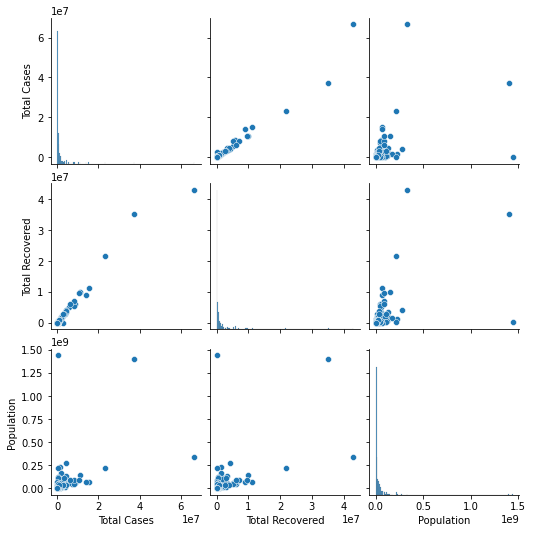

In [31]:
sns.pairplot(df2[mycols])

In [32]:
# We usually want to shuffle the data always
# Except for time series data, don't shuffle

# random_state is used to seed the shuffle

from sklearn.model_selection import train_test_split
train,test=train_test_split(df2,test_size=0.3,random_state=20,shuffle=True)

In [33]:
col=np.sort(train['Continent'].value_counts().index).tolist()
col

['Africa',
 'Asia',
 'Australia/Oceania',
 'Europe',
 'North America',
 'South America']

In [34]:
train[mycols].corr()

,Total Cases,Total Recovered,Population
Total Cases,1.000000,0.987955,0.152230
Total Recovered,0.987955,1.000000,0.162315
Population,0.152230,0.162315,1.000000


In [35]:
num_features=mycols

# remove total cases caz we will use as x variable
num_features.remove('Total Cases')
num_features

['Total Recovered', 'Population']

In [36]:
cat_features=['Continent']
cat_features

['Continent']

In [37]:
all_features=num_features+cat_features
all_features

['Total Recovered', 'Population', 'Continent']

In [38]:
final_features=num_features+col
final_features

['Total Recovered',
 'Population',
 'Africa',
 'Asia',
 'Australia/Oceania',
 'Europe',
 'North America',
 'South America']

In [39]:
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import ColumnSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor #for small data?
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
scale_pipe=make_pipeline(ColumnSelector(cols=num_features),
                        MinMaxScaler())
OneHot_pipe=make_pipeline(ColumnSelector(cols=cat_features),
                        OneHotEncoder(dtype=np.int32,handle_unknown="ignore"))
Pipe=Pipeline([('all',FeatureUnion([('num',scale_pipe),('cat',OneHot_pipe)])),
                    ('lr',SGDRegressor(max_iter = 1000))])

### Train

In [40]:
x_train=train.drop(['Total Cases'],axis=1)
y_train=train[['Total Cases']]

In [41]:
Pipe.fit(x_train,y_train)

/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('all',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(cols=['Total '
                                                                                       'Recovered',
                                                                                       'Population'])),
                                                                 ('minmaxscaler',
                                                                  MinMaxScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(cols=['Continent'])),
                                                                 ('onehotencoder',
                                          

In [42]:
y_train_pred=Pipe.predict(x_train)

In [43]:
print(Pipe.named_steps['lr'].intercept_)
print(Pipe.named_steps['lr'].coef_)
print(final_features)

[30792.37475501]
[ 1.70344617e+07  1.43776071e+06  1.31172869e+04  2.37338372e+05
 -3.09545769e+04  1.07254679e+06  1.44111110e+05  1.59856394e+06]
['Total Recovered', 'Population', 'Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America', 'South America']


In [44]:
r2_score(y_train,y_train_pred)

0.895267714452226

### Test

In [45]:
x_test=test.drop(['Total Cases'],axis=1)
y_test=test[['Total Cases']]

In [46]:
y_test_pred=Pipe.predict(x_test)

### Evaluate Result

Text(0, 0.5, 'y_test_pred')

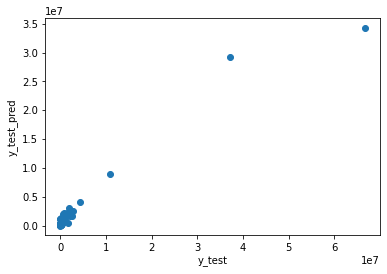

In [47]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [48]:
r2_score(y_test,y_test_pred)

0.7996110405725181

In [49]:
mean_absolute_percentage_error(y_test,y_test_pred)

11.440097141770439

In [50]:
mean_squared_error(y_test,y_test_pred)

18853568909045.52

### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
x=df2.drop(['Total Cases'],axis=1)
y=df2[['Total Cases']]

In [52]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3)
scores=cross_val_score(Pipe, x, y, cv=cv,scoring='r2')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("the intercept is %.2f" %Pipe.named_steps['lr'].intercept_)
for i in range(0,len(final_features)):
    print("the coef of "+ final_features[i] +"is %.2f" %Pipe.named_steps['lr'].coef_[i])
    i=i+1

0.82 accuracy with a standard deviation of 0.14
the intercept is 30792.37
the coef of Total Recoveredis 17034461.69
the coef of Populationis 1437760.71
the coef of Africais 13117.29
the coef of Asiais 237338.37
the coef of Australia/Oceaniais -30954.58
the coef of Europeis 1072546.79
the coef of North Americais 144111.11
the coef of South Americais 1598563.94


/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: Converge